<img src=http://transjakarta.co.id/tj-berkas/gambar/logo/tj.png>

## LATAR BELAKANG DAN RANGKUMAN ##

Transjakarta adalah Layanan Transportasi Umum berpusat di Jakarta. Bulan April 2023, Transjakarta melakukan evaluasi bulanan untuk mendapatkan insight terbaru agar kedepannya berbagai layanan dapat ditingkatkan lagi. Kini Jak Lingko hadir bersama Transjakarta untuk menambah Layanan Transportasi Umum. Terdapat berbagai jenis layanan Transjakarta, seperti:
* BRT
* Non-BRT
* Trans Jabodetabek
* Royal Trans
* Mikrotrans / Jak Lingko 
* Wisata
* Rumah Susun 

Rangkuman Analisis:
1. Identitas Pengguna Transjakarta
    - Pengguna Transjakarta berdasarkan umur.
    - Pengguna Transjakatta berdasarkan jenis kelamin.
    - Perbandingan pengguna Transjakarta berdasarkan kategori umur dan jenis kelamin.
2. Keuangan dan Alat Bayar
    - Pengguna Transjakarta berdasarkan alat bayar.
    - Perbandingan pengguna Transjakarta berdasarkan alat bayar dan jumlah bayar.
    - Membuat Kategori berdasarkan jenis layanan transjakarta menggunakan jumlah bayar
3. Koridor Transjakarta
    - Koridor tersibuk dan tersepi secara keseluruhan (TapIn)
    - Koridor berdasarkan penumpang dan jenis kelamin (TapIn)
    - Koridor tersibuk dan tersepi secara keseluruhan (TapOut)
    - Koridor berdasarkan penumpang dan jenis kelamin (TapOut)
4. Peak Hours
5. Analisis RFM


## MENGENALI DATA ##

Tahapan pertama adalah Mengenali data. Mengenali data adalah melihat apa saja terdapat dalam dataset Transjakarta, mengenali bentuk data dan mengenali berbagai rangkuman data.

In [664]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import missingno as msno
import plotly.express as px    
import plotly.graph_objects as go 
from plotly.subplots import make_subplots

In [665]:
df=pd.read_csv('Transjakarta.csv')
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [666]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [667]:
df.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


In [668]:
df.describe(include='object')

,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


*Insight* :
* Terdapat 22 kolom dan 37.900 baris pada dataset transjakarta.
* Terdapat ketidaksesuaian jumlah unik antara corridorID dan CorridorName.

## DATA DUPLIKAT ##

Karena terdapat ketidaksesuaian antara jumlah Unik corridorID dan corridorName maka kita akan mengecek kemungkinan data duplikat pada variabel tersebut.

In [669]:
cekDuplikatCorridor = df.groupby('corridorName')['corridorID'].nunique()
hasilDuplikat = cekDuplikatCorridor[cekDuplikatCorridor > 1].to_frame().reset_index().rename(columns={'corridorID':'totalCorridorID'})
hasilDuplikat

,corridorName,totalCorridorID
0,Blok M - Kota,2
1,Kalideres - Bundaran HI via Veteran,2
2,Matraman Baru - Ancol,2
3,Pinang Ranti - Pluit,2
4,Pulo Gadung - Monas,2


In [670]:
idCorridor = []
for i in hasilDuplikat['corridorName']:
    idUnik = df[df['corridorName'] == i]['corridorID'].unique()
    idCorridor.append(idUnik)
hasilDuplikat['corridorID'] = idCorridor
hasilDuplikat

,corridorName,totalCorridorID,corridorID
0,Blok M - Kota,2,"[M1, 1]"
1,Kalideres - Bundaran HI via Veteran,2,"[M3, 3, nan]"
2,Matraman Baru - Ancol,2,"[5, nan, M5]"
3,Pinang Ranti - Pluit,2,"[M9, 9, nan]"
4,Pulo Gadung - Monas,2,"[2, M2, nan]"


In [671]:
df.loc[(df['corridorID'] == '1') & (df['corridorName'] == 'Blok M - Kota'), 'corridorName'] = 'Blok M - Kota 1'
df.loc[(df['corridorID'] == '2') & (df['corridorName'] == 'Pulo Gadung - Monas'), 'corridorName'] = 'Pulo Gadung - Monas 2'
df.loc[(df['corridorID'] == '3') & (df['corridorName'] == 'Kalideres - Bundaran HI via Veteran'), 'corridorName'] = 'Kalideres - Bundaran HI via Veteran 3'
df.loc[(df['corridorID'] == '5') & (df['corridorName'] == 'Matraman Baru - Ancol'), 'corridorName'] = 'Matraman Baru - Ancol 5'
df.loc[(df['corridorID'] == '9') & (df['corridorName'] == 'Pinang Ranti - Pluit'), 'corridorName'] = 'Pinang Ranti - Pluit 9'

In [672]:
cekDuplikatCorridor2 = df.groupby('corridorName')['corridorID'].nunique()
cekDuplikatCorridor2[cekDuplikatCorridor2 > 1]

Series([], Name: corridorID, dtype: int64)

Data Duplikat terdapat 5 data, lalu berhasil dijadikan data unik kembali.

## MISSING VALUE ##

Terdapat 10 kolom yang memiliki *missing value*. Besaran tiap kolom yang terdapat *missing value* tidak terlalu signifikan dengan toal data pada dataset Transajakarta.

In [673]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

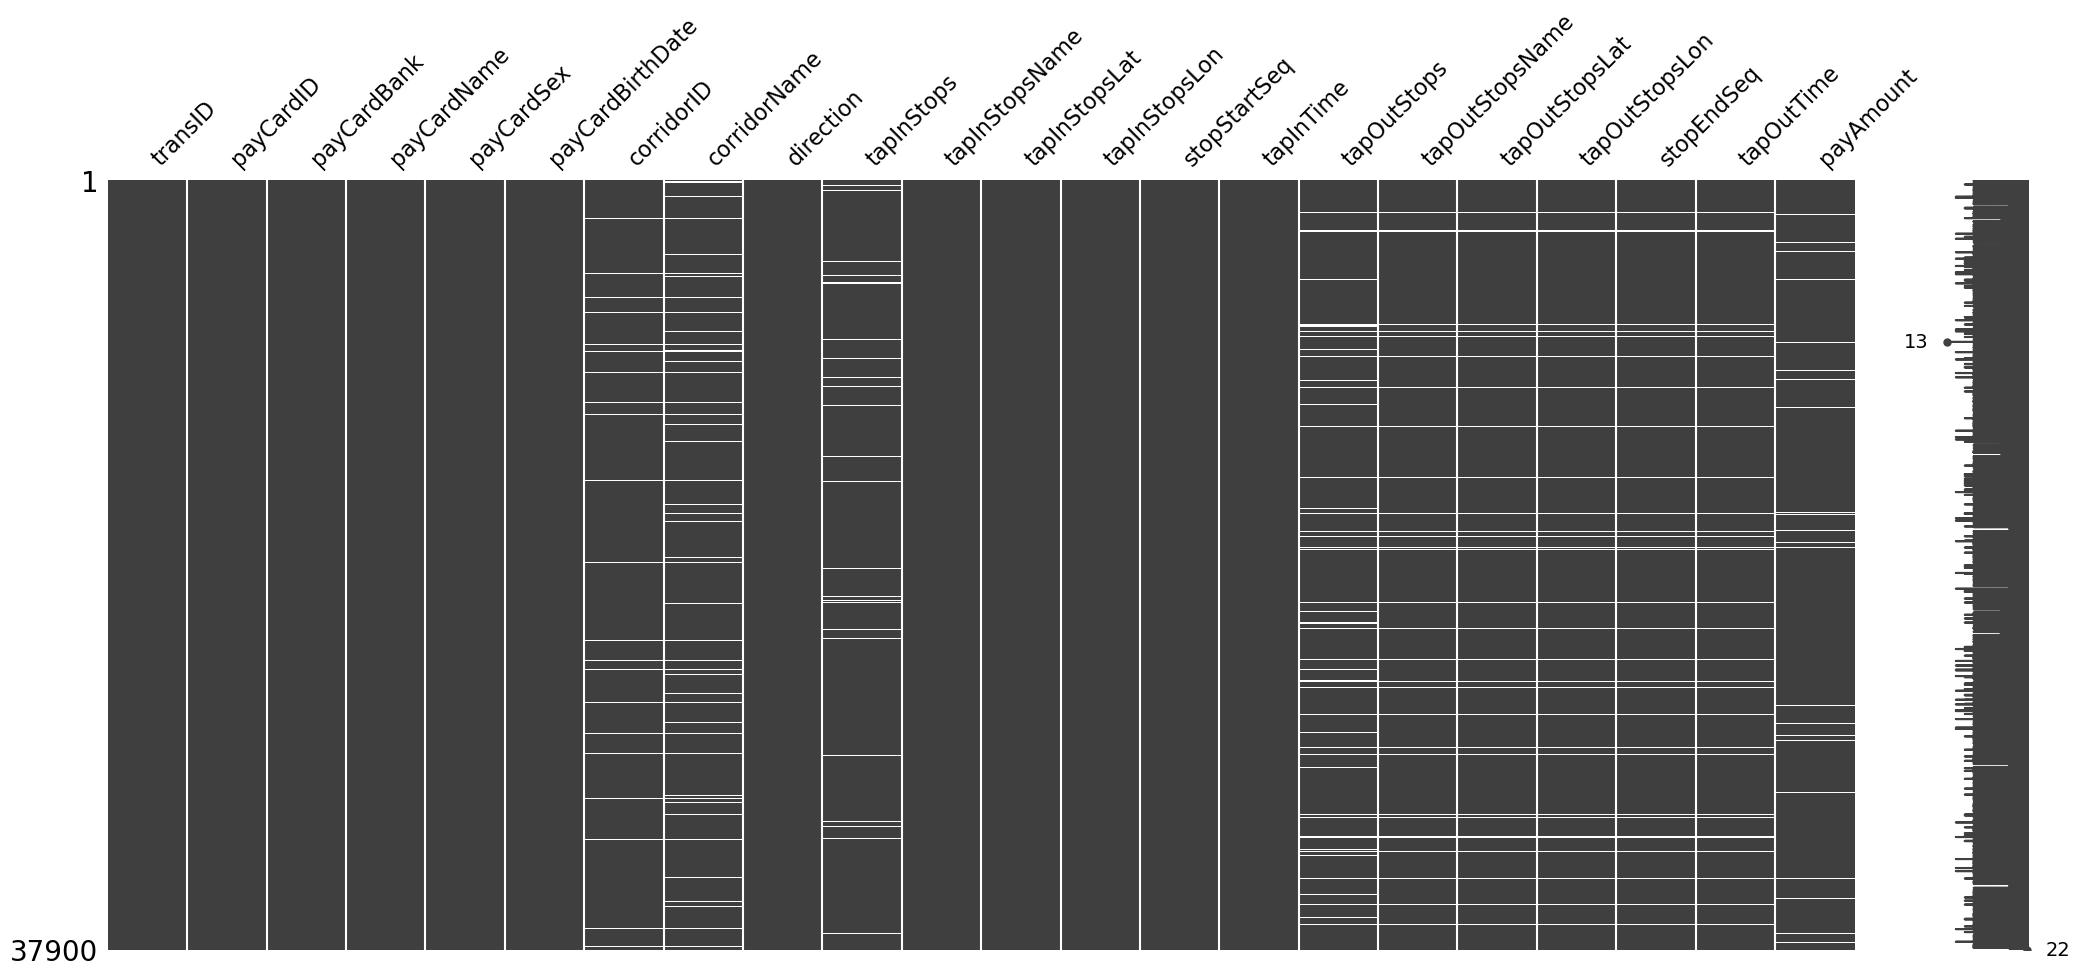

In [674]:
msno.matrix(df)
plt.show()

In [675]:
df = df.dropna()

In [676]:
df.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

Terjadinya *Missing Value* pada dataset Transjakarta bukan semerta-merta hanya kekosongan biasa, pasti ada sebab yang krusial dari perangkat maupun sistem Transjakarta pada lokasi Halte. Sehingga pihak Transjakarta harus memeriksa kembali perangkat dan sistem agar tidak terjadi hal serupa.

## TAMBAH DAN MODIF DATA ##

In [677]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

In [678]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol 5,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


## ANALISIS DATA ##

### IDENTITAS CUSTOMER ###
Analisis pertama yang dilakukan adalah mengetahui identitas tiap penumpang dari dataset Transjakarta. Identitas sederhana yang terdapat pada dataset adalah Jenis Kelamin dan Tahun Kelahiran tiap pengguna. Maka dari itu kita dapat melakukan analsisis proporsi tiap pengguna berdasarkan Jenis Kelamin dan Umur Pengguna.

In [679]:
identity = df[['payCardName','payCardSex','payCardBirthDate']]
identity

,payCardName,payCardSex,payCardBirthDate
0,Bajragin Usada,M,2008
1,Gandi Widodo,F,1997
2,Emong Wastuti,F,1992
3,Surya Wacana,F,1978
4,Embuh Mardhiyah,M,1982
...,...,...,...
37895,Kamila Mahendra,F,2004
37896,Titi Siregar,M,1974
37897,drg. Zahra Nashiruddin,F,1976
37898,Ana Agustina,M,1976


In [680]:
year = 2023
identity['payCardAge'] = year - identity['payCardBirthDate']

/var/folders/jp/kqzf5z7d4gg594lx82fkysvh0000gn/T/ipykernel_15472/3933677028.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [681]:
def payCardAgeCategory(num):
    if num < 12:
        return 'Kanak-Kanak'
    elif num < 26:
        return 'Remaja'
    elif num < 46:
        return 'Dewasa'
    else:
        return 'Lansia'

identity['payCardAgeCategory'] = identity['payCardAge'].apply(payCardAgeCategory)
df['payCardAgeCategory'] = identity['payCardAge'].apply(payCardAgeCategory)
identity

/var/folders/jp/kqzf5z7d4gg594lx82fkysvh0000gn/T/ipykernel_15472/2789341231.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,payCardName,payCardSex,payCardBirthDate,payCardAge,payCardAgeCategory
0,Bajragin Usada,M,2008,15,Remaja
1,Gandi Widodo,F,1997,26,Dewasa
2,Emong Wastuti,F,1992,31,Dewasa
3,Surya Wacana,F,1978,45,Dewasa
4,Embuh Mardhiyah,M,1982,41,Dewasa
...,...,...,...,...,...
37895,Kamila Mahendra,F,2004,19,Remaja
37896,Titi Siregar,M,1974,49,Lansia
37897,drg. Zahra Nashiruddin,F,1976,47,Lansia
37898,Ana Agustina,M,1976,47,Lansia


In [682]:
ageCategory = identity['payCardAgeCategory'].value_counts().to_frame().reset_index()
ageCategory

,payCardAgeCategory,count
0,Dewasa,17113
1,Remaja,8805
2,Lansia,5122
3,Kanak-Kanak,690


In [683]:
px.bar(
    ageCategory,
    x='payCardAgeCategory',
    y='count',
    title="Penumpang Berdasarkan Kategori Umur"
)

In [684]:
genderCategory = identity['payCardSex'].value_counts().to_frame().reset_index()
genderCategory

,payCardSex,count
0,F,16939
1,M,14791


In [685]:
# Graphic Objects Plotly (Advanced)
# Create subplot with 1 row and 2 columns
# in matplotlib, this is similar with plt.subplots(1, 2)
fig = go.Figure()

# Create first pie plot about survival data in coords (1,1)
fig.add_trace(go.Pie(labels = genderCategory["payCardSex"], 
                     values = genderCategory["count"], 
                     name  = "Survive?",
                     marker= {'colors': ["Red","LightSkyBlue"]}),
              )
fig.update_traces(hole=0.7, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Penumpang Berdasarkan Jenis Kelamin",
    showlegend=False,
    annotations=[dict(text="Total Passenger", x=0.17+0.33, y=0.65, font_size=15, showarrow=False),
                 dict(text=str(genderCategory["count"].sum()), x=0.190+0.31, y=0.55, font_size=40, showarrow=False),
                 dict(text="M", x=0.481, y=0.425, font_size=15, showarrow=False),
                 dict(text="F", x=0.481+0.06, y=0.425, font_size=15, showarrow=False),
                ])

# 3. Add two additional boxes
## First Box (Blue Color)
fig.add_shape(type="rect",
    x0=0.1+0.35,
    y0=0.40, 
    x1=0.2+0.27, 
    y1=0.45,
    line=dict(
        color="Black",
        width=2,
    ),
    fillcolor="LightSkyBlue",
)

## Second Box (Red Color)
fig.add_shape(type="rect",
    x0=0.18+0.06+0.27, 
    y0=0.40, 
    x1=0.2+0.06+0.27, 
    y1=0.45,
    line=dict(
        color="Black",
        width=2,
    ),
    fillcolor="Red",
)

# Show the result
fig.show()

In [686]:
ageCategoryMale = identity[identity['payCardSex']=='M']['payCardAgeCategory'].value_counts().to_frame().reset_index()
ageCategoryMale

,payCardAgeCategory,count
0,Dewasa,7523
1,Lansia,3670
2,Remaja,3470
3,Kanak-Kanak,128


In [687]:
ageCategoryFemale = identity[identity['payCardSex']=='F']['payCardAgeCategory'].value_counts().to_frame().reset_index()
ageCategoryFemale

,payCardAgeCategory,count
0,Dewasa,9590
1,Remaja,5335
2,Lansia,1452
3,Kanak-Kanak,562


In [688]:
fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=['Perempuan', 'Laki-Laki'],
    x_title="Jumlah Penumpang",
)

female_barplot = go.Bar(
    y=ageCategoryFemale['payCardAgeCategory'],           
    x=ageCategoryFemale['count'],         
    hoverinfo='all',
    name='Female',
    orientation='h'
)

male_barplot = go.Bar(
    y=ageCategoryMale['payCardAgeCategory'],            
    x=ageCategoryMale['count'],          
    hoverinfo='all',
    name='Male',
    orientation='h'
)

fig.add_trace(female_barplot, 1, 1)     
fig.add_trace(male_barplot, 1, 2)       

fig

##### *Insight*: #####
    - Jenis Kelamin Perempuan lebih banyak menjadi pengguna Transjakarta
    - Berdasarkan kategori umur, pengguna Transjakarta terbanyak adalah para kaum dewasa, sedangkan pengguna Transjakarta terkecil adalah kaum kanak-kanak.
    - Setelah dipisah berdasarkan jenis kelamin. Kaum Dewasa mendominasi baik laki-laki maupun perempuan menjadi pengguna Transjakarta
    

### ALAT BAYAR DAN KEUANGAN ###

Alat pembayaran yang dipakai pengguna bermacam-macam, sehingga kita dapat melihat kebiasaan pengguna dalam melakukan pembayaran. Jenis layanan dapat dilihat dari pembayaran tiap transaksi, sehingga dapat mengetahui pengguna menggunakan layanan apa.

In [689]:
finance = df[['payCardName','payCardBank','payAmount']]
finance.head()

,payCardName,payCardBank,payAmount
0,Bajragin Usada,emoney,3500.0
1,Gandi Widodo,dki,3500.0
2,Emong Wastuti,dki,3500.0
3,Surya Wacana,flazz,3500.0
4,Embuh Mardhiyah,flazz,3500.0


In [690]:
def LayananCategory(num):
    if num == 3500:
        return 'BRT / NON BRT / Trans Jabodetabek'
    elif num == 20000:
        return 'Royal Trans'
    else:
        return 'RumahSusun / Wisata / Mikrotrans'

finance['serviceCategory'] = finance['payAmount'].apply(LayananCategory)
finance

/var/folders/jp/kqzf5z7d4gg594lx82fkysvh0000gn/T/ipykernel_15472/3635359575.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,payCardName,payCardBank,payAmount,serviceCategory
0,Bajragin Usada,emoney,3500.0,BRT / NON BRT / Trans Jabodetabek
1,Gandi Widodo,dki,3500.0,BRT / NON BRT / Trans Jabodetabek
2,Emong Wastuti,dki,3500.0,BRT / NON BRT / Trans Jabodetabek
3,Surya Wacana,flazz,3500.0,BRT / NON BRT / Trans Jabodetabek
4,Embuh Mardhiyah,flazz,3500.0,BRT / NON BRT / Trans Jabodetabek
...,...,...,...,...
37895,Kamila Mahendra,brizzi,3500.0,BRT / NON BRT / Trans Jabodetabek
37896,Titi Siregar,dki,3500.0,BRT / NON BRT / Trans Jabodetabek
37897,drg. Zahra Nashiruddin,emoney,20000.0,Royal Trans
37898,Ana Agustina,emoney,0.0,RumahSusun / Wisata / Mikrotrans


In [691]:
finance['payCardBank'].value_counts().to_frame().reset_index()

,payCardBank,count
0,dki,15702
1,emoney,5813
2,brizzi,2922
3,flazz,2667
4,online,2364
5,bni,2262


In [692]:
finance['payAmount'].value_counts().to_frame().reset_index()

,payAmount,count
0,3500.0,15914
1,0.0,14283
2,20000.0,1533


In [693]:
financeCategory0 = finance[finance['payAmount']==0]['payCardBank'].value_counts().to_frame().reset_index()
financeCategory20 = finance[finance['payAmount']==20000]['payCardBank'].value_counts().to_frame().reset_index()
financeCategory3500 = finance[finance['payAmount']==3500]['payCardBank'].value_counts().to_frame().reset_index()

In [694]:
fig = go.Figure()

barplot0 = go.Bar(
    y=financeCategory0['payCardBank'],               
    x=financeCategory0['count'],          
    hoverinfo='all',
    name='0',
    hovertemplate = 'Pclass= %{y:.0f}, Number Passenger= %{x:.0f}',
    orientation='h'
)
barplot3500 = go.Bar(
    y=financeCategory3500['payCardBank'],             
    x=financeCategory3500['count'],          
    hoverinfo='all',
    name='3500',
    hovertemplate = 'Pclass= %{y:.0f}, Number Passenger= %{x:.0f}',
    orientation='h'
)

barplot20 = go.Bar(
    y=financeCategory20['payCardBank'],               
    x=financeCategory20['count'],          
    hoverinfo='all',
    name='20000',
    hovertemplate = 'Pclass= %{y:.0f}, Number Passenger= %{x:.0f}',
    orientation='h'
)

fig.add_trace(barplot0)     
fig.add_trace(barplot3500) 
fig.add_trace(barplot20)      

fig.update_layout(
    barmode='stack',
    title_text='Perbandingan berdasarkan Harga Bus dari Alat Bayar',
    title_x=0.5,                                    # agar judul pada posisi x pindah ke tengah
    xaxis_title='Jumlah Penumpang',
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell")
)

fig

##### *Insight*: #####
    - Alat bayar terbanyak digunakan oleh pengguna Transjakarta adalah DKI.
    - Berdasarkan layanan, Layanan BRT / NON BRT / Trans Jabodetabek adalah layanan terbanyak digunakan pengguna Transjakarta dengan bayaran 3500 tiap transaksi
    

### KORIDOR TRANSJAKARTA TAP IN ###

In [695]:
corridorHigh = df[['tapInStopsLat','tapInStopsLon','tapInStopsName','corridorID','corridorName']].value_counts().reset_index().sort_values(by='count', ascending=False).head()
corridorHigh[['corridorName','count']]

,corridorName,count
0,Pinang Ranti - Pramuka,145
1,Rusun Kapuk Muara - Penjaringan,108
2,Rusun Kapuk Muara - Penjaringan,103
3,Harmoni - Jakarta International Stadium,81
4,Cibubur - BKN,75


In [696]:
corridorLow = df[['tapInStopsLat','tapInStopsLon','tapInStopsName','corridorID','corridorName']].value_counts().reset_index().sort_values(by='count').head()
corridorLow[['corridorName','count']]

,corridorName,count
3365,Kampung Rambutan - Ragunan,1
2394,Rusun Sindang Koja - Kp. Sawah,1
2395,Rusun Sindang Koja - Kp. Sawah,1
2396,Pasar Minggu - Ciganjur via KB Ragunan,1
2397,Rusun Waduk Pluit - Penjaringan,1


In [697]:
import folium

jakarta_map = folium.Map([-6.191861352405944, 106.82608477268178], zoom_start=11)
halte = folium.map.FeatureGroup()

for lat, long in list(zip(corridorHigh['tapInStopsLat'], corridorHigh['tapInStopsLon'])):
    halte.add_child(
        folium.Marker(
    [lat, long],
    tooltip='Koridor TOP 5 Tersibuk',                                           
    icon=folium.Icon(
        icon='bus',                                                                           
        prefix='fa',                                                       
        color='green'                                                 
    ))
)

for lat, long in list(zip(corridorLow['tapInStopsLat'], corridorLow['tapInStopsLon'])):
    halte.add_child(
        folium.Marker(
    [lat, long],
    tooltip='Koridor TOP 5 Tersepi',                                
    icon=folium.Icon(
        icon='bus',                                                                                
        prefix='fa',                                                     
        color='red'                                                  
    ))
)

jakarta_map.add_child(halte)

jakarta_map

In [698]:
corridorFemale = df[df['payCardSex']=='F'][['tapInStopsLat','tapInStopsLon','tapInStopsName','corridorID','corridorName']].value_counts().reset_index().sort_values(by='count', ascending=False).head()
corridorFemale[['corridorName','count']]

,corridorName,count
0,Pinang Ranti - Pramuka,72
1,Pulo Gadung - Monas 2,59
2,Puri Beta 2 - Tendean,54
3,Rusun Kapuk Muara - Penjaringan,52
4,Pulo Gadung 2 - Tosari,52


In [699]:
corridorMale = df[df['payCardSex']=='M'][['tapInStopsLat','tapInStopsLon','tapInStopsName','corridorID','corridorName']].value_counts().reset_index().sort_values(by='count', ascending=False).head()
corridorMale[['corridorName','count']]

,corridorName,count
0,Pinang Ranti - Pramuka,73
1,Harmoni - Jakarta International Stadium,62
2,Rusun Kapuk Muara - Penjaringan,56
3,Ragunan - MH Thamrin via Kuningan,55
4,Cibubur - BKN,52


In [700]:
import folium

jakarta_map = folium.Map([-6.191861352405944, 106.82608477268178], zoom_start=11)
halte = folium.map.FeatureGroup()

for lat, long in list(zip(corridorFemale['tapInStopsLat'], corridorFemale['tapInStopsLon'])):
    halte.add_child(
        folium.Marker(
    [lat, long],
    tooltip='Koridor TOP 5 Perempuan',                                           
    icon=folium.Icon(
        icon='bus',                                                                           
        prefix='fa',                                                       
        color='pink'                                                 
    ))
)

for lat, long in list(zip(corridorMale['tapInStopsLat'], corridorMale['tapInStopsLon'])):
    halte.add_child(
        folium.Marker(
    [lat, long],
    tooltip='Koridor TOP 5 Laki-Laki',                                
    icon=folium.Icon(
        icon='bus',                                                                                
        prefix='fa',                                                     
        color='blue'                                                  
    ))
)

jakarta_map.add_child(halte)

jakarta_map

### KORIDOR TRANSJAKARTA TAP OUT ###

In [701]:
corridorHighO = df[['tapOutStopsLat','tapOutStopsLon','tapOutStopsName','corridorID','corridorName']].value_counts().reset_index().sort_values(by='count', ascending=False).head()
corridorHighO[['corridorName','count']]

,corridorName,count
0,Pinang Ranti - Pramuka,110
1,Rusun Kapuk Muara - Penjaringan,108
2,Rusun Kapuk Muara - Penjaringan,103
3,Harmoni - Jakarta International Stadium,93
4,Pinang Ranti - Pramuka,90


In [702]:
corridorLowO = df[['tapOutStopsLat','tapOutStopsLon','tapOutStopsName','corridorID','corridorName']].value_counts().reset_index().sort_values(by='count').head()
corridorLowO[['corridorName','count']]

,corridorName,count
3041,Depok - BKN,1
2228,Kampung Rambutan - Monas,1
2229,Pinang Ranti - Bundaran Senayan,1
2230,Bekasi Barat - Blok M,1
2231,Bekasi Barat - Blok M,1


In [703]:
import folium

jakarta_map = folium.Map([-6.191861352405944, 106.82608477268178], zoom_start=11)
halte = folium.map.FeatureGroup()

for lat, long in list(zip(corridorHighO['tapOutStopsLat'], corridorHighO['tapOutStopsLon'])):
    halte.add_child(
        folium.Marker(
    [lat, long],
    tooltip='Koridor TOP 5 Tersibuk',                                           
    icon=folium.Icon(
        icon='bus',                                                                           
        prefix='fa',                                                       
        color='green'                                                 
    ))
)

for lat, long in list(zip(corridorLowO['tapOutStopsLat'], corridorLowO['tapOutStopsLon'])):
    halte.add_child(
        folium.Marker(
    [lat, long],
    tooltip='Koridor TOP 5 Tersepi',                                
    icon=folium.Icon(
        icon='bus',                                                                                
        prefix='fa',                                                     
        color='red'                                                  
    ))
)

jakarta_map.add_child(halte)

jakarta_map

In [704]:
corridorFemaleO = df[df['payCardSex']=='F'][['tapOutStopsLat','tapOutStopsLon','tapOutStopsName','corridorID','corridorName']].value_counts().reset_index().sort_values(by='count', ascending=False).head()
corridorFemaleO[['corridorName','count']]

,corridorName,count
0,Pinang Ranti - Pramuka,54
1,Cililitan - Condet,53
2,Rusun Kapuk Muara - Penjaringan,52
3,Rusun Kapuk Muara - Penjaringan,51
4,Rusun Waduk Pluit - Penjaringan,49


In [705]:
corridorMaleO = df[df['payCardSex']=='M'][['tapOutStopsLat','tapOutStopsLon','tapOutStopsName','corridorID','corridorName']].value_counts().reset_index().sort_values(by='count', ascending=False).head()
corridorMaleO[['corridorName','count']]

,corridorName,count
0,Harmoni - Jakarta International Stadium,72
1,Cibubur - BKN,58
2,Rusun Kapuk Muara - Penjaringan,56
3,Pinang Ranti - Pramuka,56
4,Pinang Ranti - Pramuka,53


In [706]:
import folium

jakarta_map = folium.Map([-6.191861352405944, 106.82608477268178], zoom_start=11)
halte = folium.map.FeatureGroup()

for lat, long in list(zip(corridorFemaleO['tapOutStopsLat'], corridorFemaleO['tapOutStopsLon'])):
    halte.add_child(
        folium.Marker(
    [lat, long],
    tooltip='Koridor TOP 5 Perempuan',                                           
    icon=folium.Icon(
        icon='bus',                                                                           
        prefix='fa',                                                       
        color='pink'                                                 
    ))
)

for lat, long in list(zip(corridorMaleO['tapOutStopsLat'], corridorMaleO['tapOutStopsLon'])):
    halte.add_child(
        folium.Marker(
    [lat, long],
    tooltip='Koridor TOP 5 Laki-Laki',                                
    icon=folium.Icon(
        icon='bus',                                                                                
        prefix='fa',                                                     
        color='blue'                                                  
    ))
)

jakarta_map.add_child(halte)

jakarta_map

### PEAK HOURS ###

In [707]:
df['hourTapIn'] = df['tapInTime'].dt.hour
df['dayTapIn'] = df['tapInTime'].dt.dayofweek
dayTapIn = {
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thu',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
}
df['dayTapIn'] = df['dayTapIn'].map(dayTapIn)

peakhours = pd.crosstab(df['dayTapIn'], df['hourTapIn'])
peakhours

hourTapIn,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
dayTapIn,,,,,,,,,,,,,,,,,
Fri,533,947,415,452,446,21,28,19,22,0,29,556,872,352,364,365,338
Mon,526,949,453,427,423,12,22,12,31,1,20,504,872,366,370,381,323
Sat,96,82,79,101,93,80,78,95,84,69,105,103,125,89,99,94,66
Sun,91,90,89,98,83,90,93,86,100,73,97,87,102,88,105,115,65
Thu,532,929,410,441,448,18,25,19,24,3,28,526,865,391,365,360,342
Tue,516,949,465,424,437,11,19,22,19,1,24,512,902,367,365,381,341
Wed,515,920,427,454,453,24,22,27,16,1,25,534,886,367,373,332,332


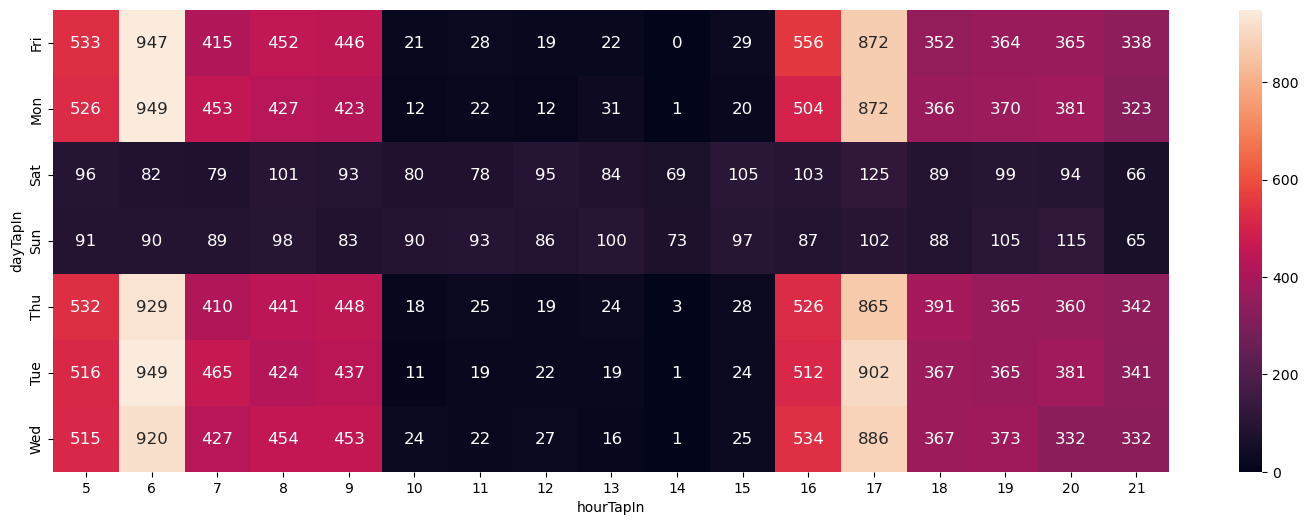

In [708]:
custom_colors = ["#FFD700", "#FFA500", "#FF8C00"]

plt.figure(figsize=(18, 6))
sns.set_palette(custom_colors)
sns.heatmap(peakhours, annot=True, annot_kws={'size': 12}, fmt='.0f')
plt.show()

### ANALISIS RFM ###

In [709]:
rfm = df[['payCardName','payCardBank','tapOutTime','payAmount']]

In [710]:
max_date = rfm['tapOutTime'].max()
rfm['Recency'] = (max_date - rfm['tapOutTime']).dt.days
rfm

/var/folders/jp/kqzf5z7d4gg594lx82fkysvh0000gn/T/ipykernel_15472/3628344069.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,payCardName,payCardBank,tapOutTime,payAmount,Recency
0,Bajragin Usada,emoney,2023-04-03 06:00:53,3500.0,27
1,Gandi Widodo,dki,2023-04-03 06:40:01,3500.0,27
2,Emong Wastuti,dki,2023-04-03 06:50:55,3500.0,27
3,Surya Wacana,flazz,2023-04-03 06:28:16,3500.0,27
4,Embuh Mardhiyah,flazz,2023-04-03 06:57:03,3500.0,27
...,...,...,...,...,...
37895,Kamila Mahendra,brizzi,2023-04-21 19:55:49,3500.0,9
37896,Titi Siregar,dki,2023-04-18 22:28:22,3500.0,12
37897,drg. Zahra Nashiruddin,emoney,2023-04-04 13:27:25,20000.0,26
37898,Ana Agustina,emoney,2023-04-15 20:27:50,0.0,15


In [711]:
import datetime

analysis_date = df['tapOutTime'].max() + datetime.timedelta(1)
analysis_date

Timestamp('2023-05-01 23:23:18')

In [712]:
df_recency = df.groupby('payCardName').agg(
    recency=('tapOutTime', lambda x: (analysis_date - x.max()).days)
)

df_recency.sample(5, random_state=42)

,recency
payCardName,
Kunthara Budiman,1
Sarah Hardiansyah,13
"H. Satya Nashiruddin, S.Farm",2
"Endra Nababan, M.Farm",3
"R.A. Gasti Budiman, S.T.",4


In [713]:
df_frequency = df.groupby('payCardName').agg(
    frequency=('transID', lambda x: x.nunique()),
)

df_frequency.sample(5, random_state=42)

,frequency
payCardName,
Kunthara Budiman,4
Sarah Hardiansyah,1
"H. Satya Nashiruddin, S.Farm",3
"Endra Nababan, M.Farm",33
"R.A. Gasti Budiman, S.T.",1


In [714]:
df_monetary = df.groupby('payCardName').agg(
    monetary=('payAmount', 'sum')
)

df_monetary.sample(5, random_state=42)

,monetary
payCardName,
Kunthara Budiman,10500.0
Sarah Hardiansyah,0.0
"H. Satya Nashiruddin, S.Farm",7000.0
"Endra Nababan, M.Farm",115500.0
"R.A. Gasti Budiman, S.T.",3500.0


In [715]:
df_customer = df.groupby('payCardName').agg(
    recency=('tapOutTime', lambda x: (analysis_date - x.max()).days),
    frequency=('transID', lambda x: x.nunique()),
    monetary=('payAmount', 'sum')
)

df_customer.sample(5, random_state=42)

,recency,frequency,monetary
payCardName,,,
Kunthara Budiman,1,4,10500.0
Sarah Hardiansyah,13,1,0.0
"H. Satya Nashiruddin, S.Farm",2,3,7000.0
"Endra Nababan, M.Farm",3,33,115500.0
"R.A. Gasti Budiman, S.T.",4,1,3500.0


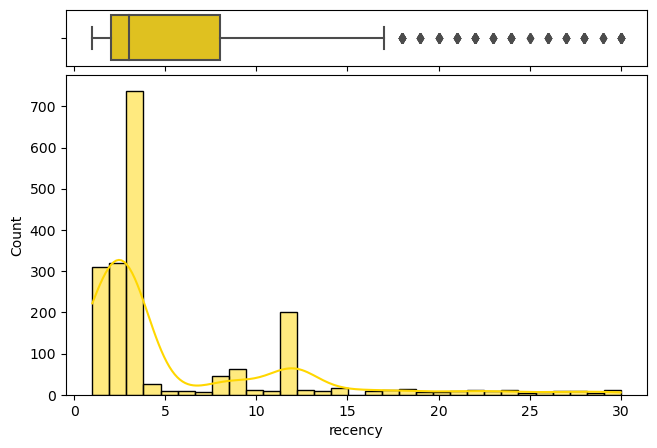

0.00     1.0
0.25     2.0
0.50     3.0
0.75     8.0
1.00    30.0
Name: recency, dtype: float64

In [716]:
grid = {
    'height_ratios': (0.15, 0.85),
    'hspace': 0.05
}

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(7.5, 5), gridspec_kw=grid)

sns.boxplot(data=df_customer, x='recency', ax=ax1)
sns.histplot(data=df_customer, x='recency', kde=True, ax=ax2)

plt.show()

display(df_customer['recency'].quantile([0, 0.25, 0.5, 0.75, 1]))

In [717]:
df_customer['r_score'] = pd.qcut(df_customer['recency'], q=4, labels=[4, 3, 2, 1]).astype(int)      # q=4, kita bagi menjadi 4 kelompok dengan jumlah yang sama
df_customer.sample(5, random_state=42)

,recency,frequency,monetary,r_score
payCardName,,,,
Kunthara Budiman,1,4,10500.0,4
Sarah Hardiansyah,13,1,0.0,1
"H. Satya Nashiruddin, S.Farm",2,3,7000.0,4
"Endra Nababan, M.Farm",3,33,115500.0,3
"R.A. Gasti Budiman, S.T.",4,1,3500.0,2


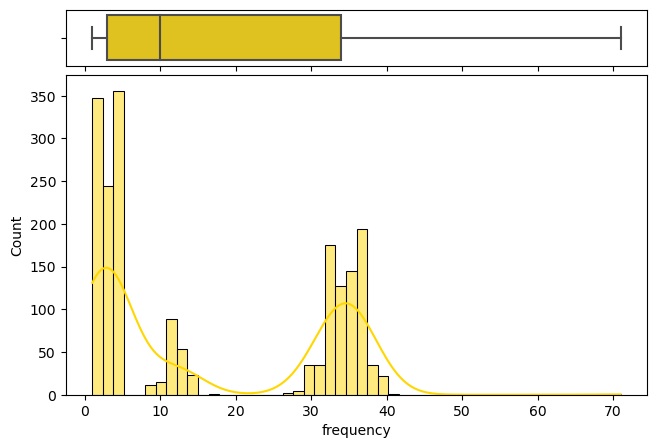

0.00     1.0
0.25     3.0
0.50    10.0
0.75    34.0
1.00    71.0
Name: frequency, dtype: float64

In [718]:
grid = {
    'height_ratios': (0.15, 0.85),
    'hspace': 0.05
}

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(7.5, 5), gridspec_kw=grid)

sns.boxplot(data=df_customer, x='frequency', ax=ax1)
sns.histplot(data=df_customer, x='frequency', kde=True, ax=ax2, bins=50)

plt.show()

display(df_customer['frequency'].quantile([0, 0.25, 0.5, 0.75, 1]))

In [719]:
def f_score(x):
    if x==1:
        return 1
    elif x <= 10:
        return 2
    elif x <= 34:
        return 3
    else:
        return 4
    
df_customer['f_score'] = df_customer['frequency'].apply(f_score)
df_customer.sample(5, random_state=42)

,recency,frequency,monetary,r_score,f_score
payCardName,,,,,
Kunthara Budiman,1,4,10500.0,4,2
Sarah Hardiansyah,13,1,0.0,1,1
"H. Satya Nashiruddin, S.Farm",2,3,7000.0,4,2
"Endra Nababan, M.Farm",3,33,115500.0,3,3
"R.A. Gasti Budiman, S.T.",4,1,3500.0,2,1


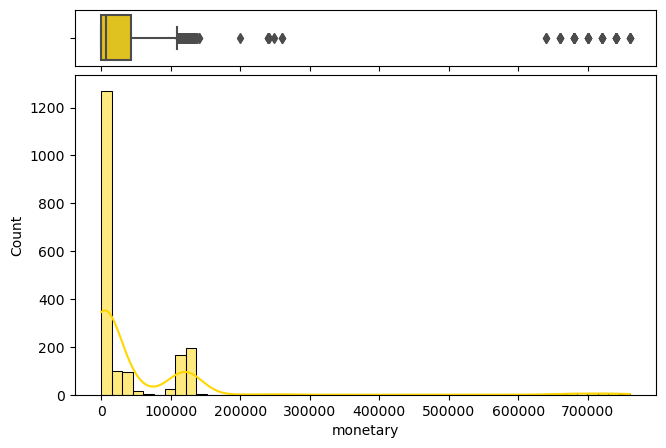

0.00         0.0
0.25         0.0
0.50      7000.0
0.75     43500.0
1.00    760000.0
Name: monetary, dtype: float64

In [720]:
grid = {
    'height_ratios': (0.15, 0.85),
    'hspace': 0.05
}

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(7.5, 5), gridspec_kw=grid)

sns.boxplot(data=df_customer, x='monetary', ax=ax1)
sns.histplot(data=df_customer, x='monetary', kde=True, ax=ax2, bins=50)

plt.show()

display(df_customer['monetary'].quantile([0, 0.25, 0.5, 0.75, 1]))

In [721]:
df_customer['m_score'] = pd.qcut(df_customer['monetary'], q=3, labels=[1, 2, 3]).astype(int)
df_customer.sample(5, random_state=41)

,recency,frequency,monetary,r_score,f_score,m_score
payCardName,,,,,,
Widya Mulyani,1,4,23500.0,4,2,3
Suci Hutagalung,2,34,3500.0,4,3,1
"Jaya Saptono, S.Psi",20,1,3500.0,1,1,1
Drs. Victoria Sihombing,12,13,0.0,1,3,1
"KH. Indra Haryanti, S.Gz",3,30,0.0,3,3,1


In [722]:
df_customer['rfm_score'] = df_customer['r_score'] + df_customer['f_score'] + df_customer['m_score']
df_customer.sample(5, random_state=42)

,recency,frequency,monetary,r_score,f_score,m_score,rfm_score
payCardName,,,,,,,
Kunthara Budiman,1,4,10500.0,4,2,2,8
Sarah Hardiansyah,13,1,0.0,1,1,1,3
"H. Satya Nashiruddin, S.Farm",2,3,7000.0,4,2,2,8
"Endra Nababan, M.Farm",3,33,115500.0,3,3,3,9
"R.A. Gasti Budiman, S.T.",4,1,3500.0,2,1,1,4


In [723]:
def rfm_segmentation(x):
    if x <= 5:
        return 'Pasif'
    elif x <= 7:
        return 'Cukup'
    elif x <= 10:
        return 'Aktif'
    else:
        return 'Sangat Aktif'
    
df_customer['rfm_level'] = df_customer['rfm_score'].apply(rfm_segmentation)
df_customer.sample(5, random_state=43)

,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,rfm_level
payCardName,,,,,,,,
"drg. Gawati Uyainah, S.T.",3,32,0.0,3,3,1,7,Cukup
dr. Gasti Budiyanto,3,37,129500.0,3,4,3,10,Aktif
dr. Balangga Zulkarnain,3,35,122500.0,3,4,3,10,Aktif
Sakti Puspita,2,2,0.0,4,2,1,7,Cukup
"Drs. Siska Firmansyah, M.M.",3,34,0.0,3,3,1,7,Cukup


In [724]:
df_customer[df_customer['rfm_level']=='Sangat Aktif']

,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,rfm_level
payCardName,,,,,,,,
Fathonah Permadi,2,37,740000.0,4,4,3,11,Sangat Aktif
Jaka Zulaika,2,36,126000.0,4,4,3,11,Sangat Aktif
Jamalia Permadi,2,37,129500.0,4,4,3,11,Sangat Aktif
Latika Maheswara,2,38,133000.0,4,4,3,11,Sangat Aktif
Marwata Najmudin,2,35,122500.0,4,4,3,11,Sangat Aktif
Rahayu Prabowo,2,40,140000.0,4,4,3,11,Sangat Aktif
"Sutan Aswani Budiyanto, M.Kom.",2,35,122500.0,4,4,3,11,Sangat Aktif


In [725]:
df.to_csv('Transjakarta1.csv')